# Importing libraries

In [14]:
import pandas as pd

In [5]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Loading dataset

In [6]:
data = pd.read_csv('Obesity.csv')

In [7]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Exploratory Data Analysis

In [8]:
#view the first few entries
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
#Print the number of rows and columns of the dataset
data.shape

(2111, 17)

In [10]:
#statistical analysis
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
## Checking the datatypes of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [12]:
## count number of missing values
print(data.isnull().sum())

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64


The columns Height,family_history_with_overweight,CAEC,SCC,MTRANS contains missing values

In [18]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

The number of males and females 

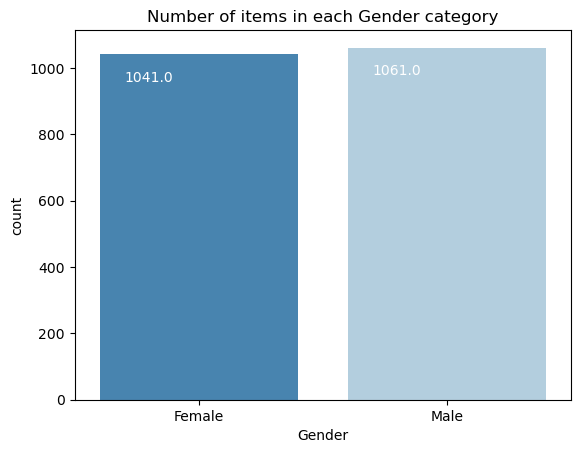

In [19]:
count_values(data, "Gender")

In [20]:
data["Age"].describe()

count    2111.000000
mean       24.488346
std         7.365358
min         2.000000
25%        19.947192
50%        22.804818
75%        26.000000
max        99.000000
Name: Age, dtype: float64

In [21]:
data["Age"].median()

22.804818

In [25]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "purple", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

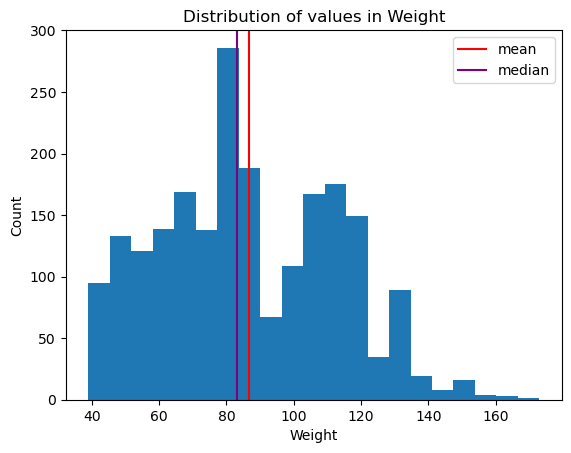

In [26]:
plot_distribution(data, "Weight")

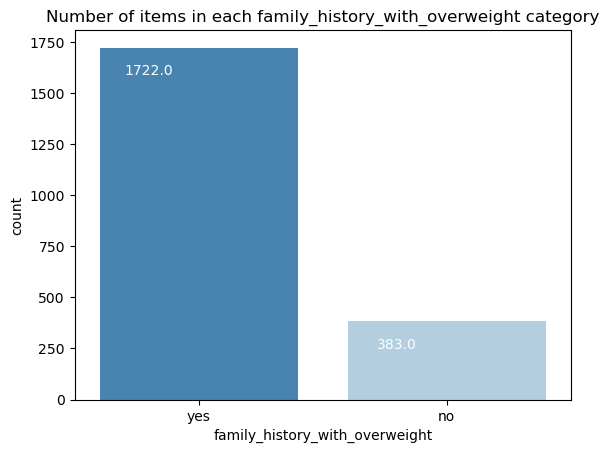

In [27]:
count_values(data, "family_history_with_overweight")

Most of the family members have overweight

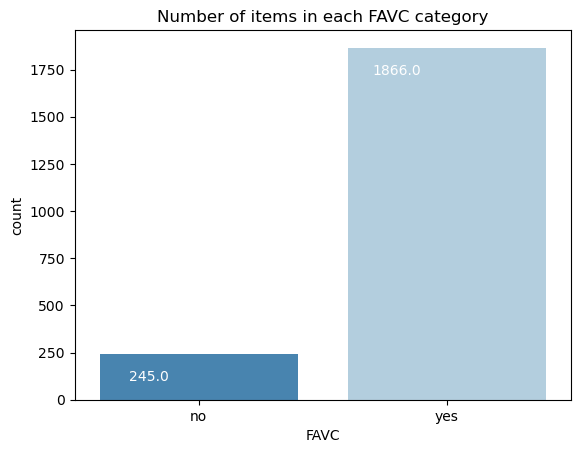

In [28]:
count_values(data, "FAVC")

physical activity

more people are consuming high caloric food

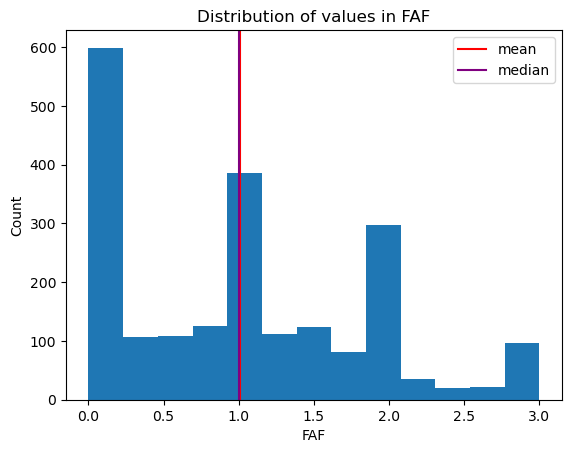

In [30]:
plot_distribution(data, "FAF")

over weight and gender

In [31]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Blues_r")
    
    plt.show()

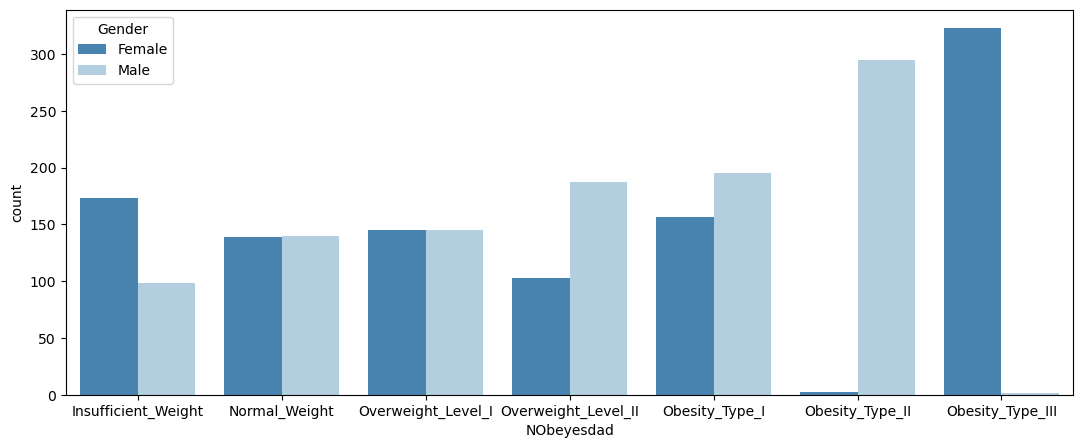

In [33]:
plt.figure(figsize = (13, 5))
cross_plot(data, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

statistics

In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.488346,7.365358,2.00,19.947192,22.804818,26.000000,99.00
Height,2101.0,1.701995,0.093288,1.45,1.630000,1.701284,1.768834,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


/var/folders/5j/3c460rfx4ksby_l3t2qfs3bc0000gn/T/ipykernel_23254/961563501.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


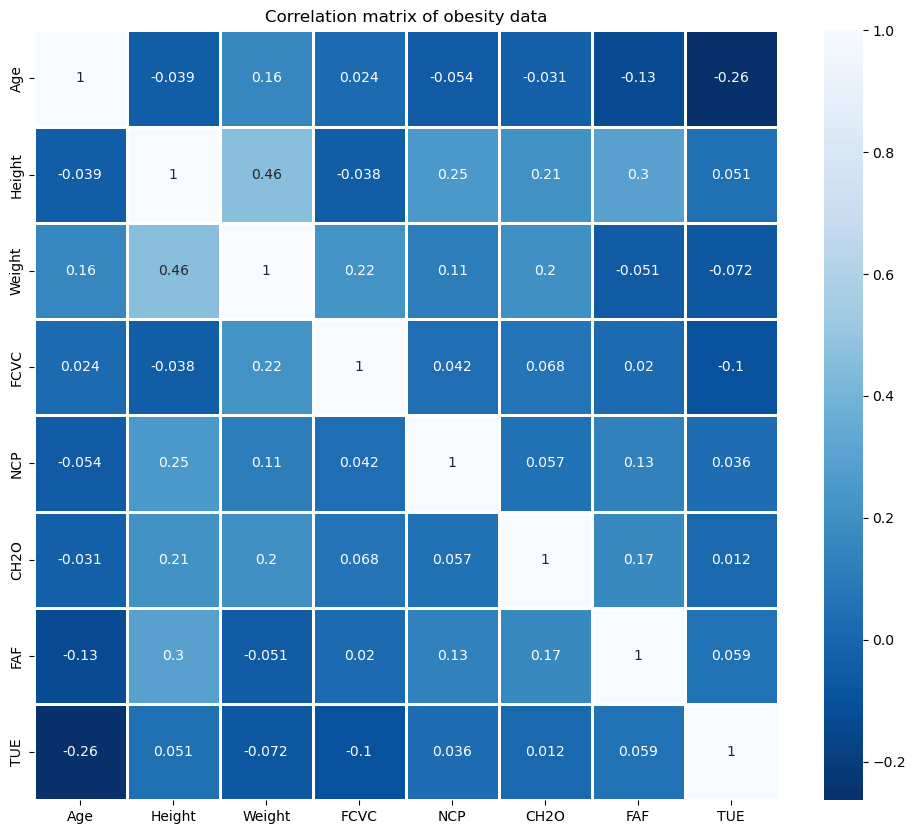

In [40]:
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(),
           annot = True,
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white")
plt.title("Correlation matrix of obesity data")
plt.show()

# Data preprocessing

In [43]:
ob_dummies = pd.get_dummies(data[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])

In [44]:
ob_lab = data[["NObeyesdad"]]

In [46]:
ob_concatenated = pd.concat([ob_dummies, ob_lab], axis = 1)

In [47]:
ob_concatenated.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,1,0,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,Normal_Weight
1,1,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,Normal_Weight
2,0,1,0,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,Normal_Weight
3,0,1,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,Overweight_Level_I
4,0,1,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,Overweight_Level_II


In [48]:
ob_label = ob_concatenated["NObeyesdad"]
ob_features = ob_concatenated.drop("NObeyesdad", axis = 1)

In [49]:
ob_label

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [55]:
from sklearn.preprocessing import MinMaxScaler , LabelEncoder

In [56]:
ob_features_scaled = MinMaxScaler().fit_transform(ob_features)

In [57]:
ob_features_scaled.min(axis = 1), ob_features_scaled.max(axis = 1)

(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))

In [58]:
encoder = LabelEncoder()

In [59]:
encoder.fit(ob_label)

LabelEncoder()

In [60]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [61]:
ob_labels_encoded = encoder.transform(ob_label)

In [62]:
ob_labels_encoded

array([1, 1, 1, ..., 4, 4, 4])

In [63]:
ob_features_tr, ob_features_ts, ob_labels_tr, ob_labels_ts = train_test_split(ob_features, ob_labels_encoded,test_size = 0.2, stratify = ob_labels_encoded,random_state = 42) 

In [64]:
ob_features_tr.shape, ob_labels_tr.shape, ob_features_ts.shape, ob_labels_ts.shape

((1688, 23), (1688,), (423, 23), (423,))

# Decision tree classifier

It is chosen for its simplicity and interpretability.

In [66]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [67]:
model_tree = DecisionTreeClassifier(max_depth = 13, random_state = 42)

In [70]:
def train_predict_score(estimator, train_features, train_labels, test_features, test_labels):
    """
    Function: Trains model, predict classes and computes accuracy and f1 score.
    
    Parameters: estimator, X_train, y_train, X_test, y_test.
    """
    estimator.fit(train_features, train_labels)
    
    print(f"Accuracy on Train data: {accuracy_score(train_labels, estimator.predict(train_features))}")
    
    print(f"Accuracy on Test data: {accuracy_score(test_labels, estimator.predict(test_features))}")
    

In [71]:
train_predict_score(model_tree, ob_features_tr, ob_labels_tr, ob_features_ts, ob_labels_ts)

Accuracy on Train data: 0.6670616113744076
Accuracy on Test data: 0.5697399527186762


confusion matrix

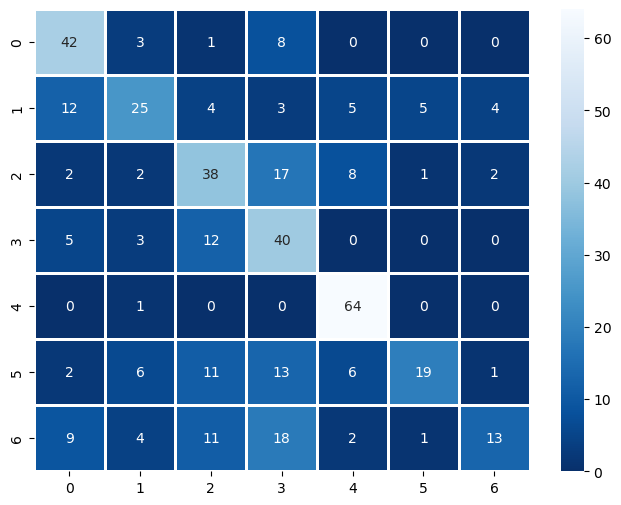

In [74]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(ob_labels_ts, model_tree.predict(ob_features_ts)),annot = True,fmt = ".0f",cmap = "Blues_r",linewidths = 2, linecolor = "white",xticklabels = model_tree.classes_,yticklabels = model_tree.classes_)
plt.show()